In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Plot de los patrones

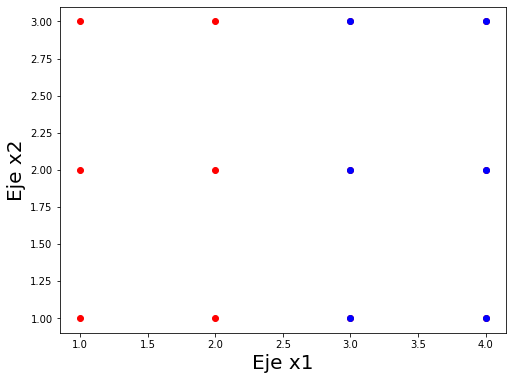

In [2]:
fig = plt.figure(figsize=(8, 6))
x1 = np.array([1,1,1,2,2,2,3,3,3,4,4,4])
y1 = np.array([1,2,3,1,2,3,1,2,3,1,2,3])

x2=np.array([3,3,3,4,4,4])
y2=np.array([1,2,3,1,2,3])
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")
plt.xlabel("Eje x1", fontsize=20)
plt.ylabel("Eje x2", fontsize=20)
plt.show()

### Función de activación (función escalón o step function)

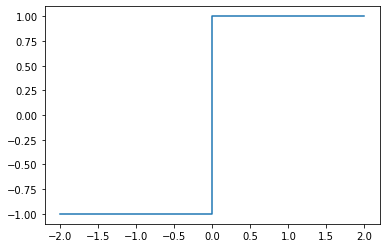

In [8]:
plt.plot([-2,-1,0,0,1,2],[-1,-1,-1,1,1,1])
plt.show()

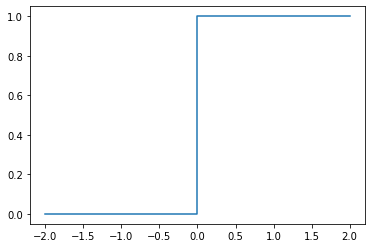

In [9]:
plt.plot([-2,-1,0,0,1,2],[0,0,0,1,1,1])
plt.show()

### Creación de la neurona

In [10]:
#Neurona
def Neurona(X, W, b):
    return sum(W*X)+b

In [11]:
#Función Escalón
def Escalon(x):
    if x<0:
        return -1
    else:
        return 1

In [12]:
#Entradas 
X=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,1],[3,3],[4,1],[4,2],[4,3]])
#Valores esperado
y=np.array([-1,-1,-1,-1,-1,-1,1,1,1,1,1,1])

In [13]:
X

array([[1, 1],
       [1, 2],
       [1, 3],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 1],
       [3, 1],
       [3, 3],
       [4, 1],
       [4, 2],
       [4, 3]])

In [14]:
y

array([-1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

In [26]:
#pesos
W = np.array([0.1,0.1])
b=0.1
#learning reate
eta=0.2

In [19]:
#Aqui estamos actualizando los pesos y el bias 1 sola vez por cada punto de entrada 
for xi, target in zip(X, y):
        yhat = Escalon(Neurona(xi,W,b))
        inc_w = eta*(target-yhat)*xi
        W += inc_w
        b += eta*(target-yhat)
print(W,b)

[0.9 0.1] 0.09999999999999998


In [17]:
# Prueba de la neurona
for xi in X:
    print(Escalon(Neurona(xi,W,b)))

1
1
1
1
1
1
1
1
1
1
1
1


In [27]:
#Entrenamiento de la neurona 
errores=[]
for i in range(20):
    error=0
    for xi, target in zip(X, y):
        yhat = Escalon(Neurona(xi,W,b))
        inc_w = eta*(target-yhat)*xi
        W += inc_w
        b += eta*(target-yhat)
        error += abs(eta*(target-yhat))
    errores.append(error)

In [28]:
W

array([ 1.7, -0.3])

In [29]:
b

-3.8999999999999995

In [30]:
# Prueba de la neurona
for xi in X:
    print(Escalon(Neurona(xi,W,b)))

-1
-1
-1
-1
-1
-1
1
1
1
1
1
1


### Grafica del error

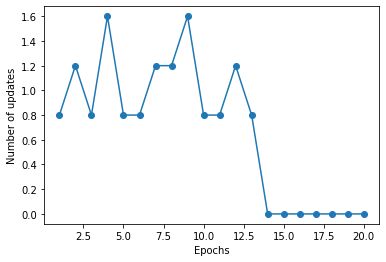

In [31]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Grafica de la neurona

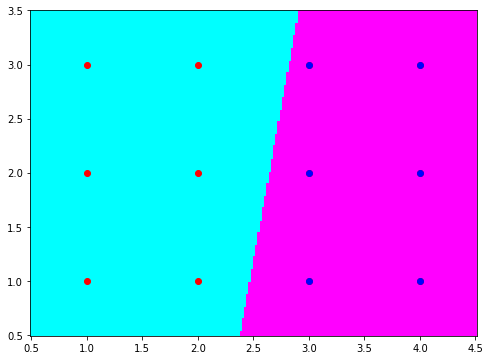

In [32]:
x_min = 0.5
x_max = 4.5
y_min = 0.5
y_max = 3.5

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = np.zeros([200,200])
for i in range(200):
    for j in range(200):
        Z=np.array([XX[i,j],YY[i,j]])
        yhat=Escalon(sum(Z*W)+b)
        ZZ[i,j]=yhat


plt.figure(figsize=(8, 6))
plt.pcolormesh(XX, YY, ZZ > 0, cmap="cool", shading='auto')

x2=np.array([3,3,3,4,4,4])
y2=np.array([1,2,3,1,2,3])
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")

plt.show()

### Ejercicio, neoruna para 2 atributos de Iris

In [3]:
import pandas as pd
df=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/iris.csv")
df.head()

,Largo Sepalo,Ancho Sepalo,Largo Petalo,Ancho Petalo,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df2=df[df["Clase"].isin(["Iris-setosa","Iris-virginica"])][["Largo Petalo","Ancho Petalo","Clase"]]
df2.head()

,Largo Petalo,Ancho Petalo,Clase
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder
class_labelEncoding = LabelEncoder()
coms = class_labelEncoding.fit_transform(df2['Clase'].values)
df2["Clase"]=coms

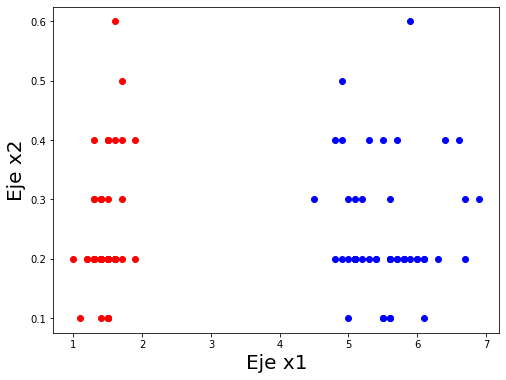

In [9]:
fig = plt.figure(figsize=(8, 6))
x1 = np.array(df2[df2["Clase"]==0]["Largo Petalo"])
y1 = np.array(df2[df2["Clase"]==0]["Ancho Petalo"])

x2=np.array(df2[df2["Clase"]==1]["Largo Petalo"])
y2=np.array(np.array(df2[df2["Clase"]==0]["Ancho Petalo"]))
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")
plt.xlabel("Eje x1", fontsize=20)
plt.ylabel("Eje x2", fontsize=20)
plt.show()

In [10]:
#Neurona
def Neurona(X, W, b):
    return sum(W*X)+b

In [16]:
#Función Escalón
def Escalon(x):
    if x<0:
        return 0
    else:
        return 1

In [17]:
#pesos
W = np.array([0.1,0.1])
b=0.1
#learning reate
eta=0.2

In [18]:
X=np.array(df2[["Largo Petalo","Ancho Petalo"]])
y=np.array(df2["Clase"])
#Entrenamiento de la neurona 
errores=[]
for i in range(20):
    error=0
    for xi, target in zip(X, y):
        yhat = Escalon(Neurona(xi,W,b))
        inc_w = eta*(target-yhat)*xi
        W += inc_w
        b += eta*(target-yhat)
        error += abs(eta*(target-yhat))
    errores.append(error)

In [19]:
# Prueba de la neurona
for xi in X:
    print(Escalon(Neurona(xi,W,b)))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


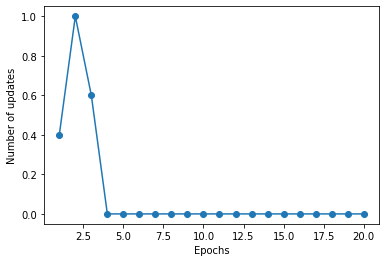

In [20]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

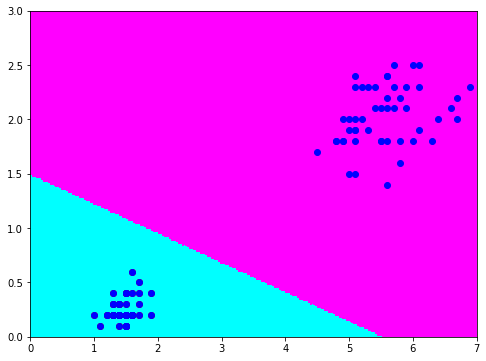

In [23]:
x_min = 0
x_max = 7
y_min = 0
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = np.zeros([200,200])
for i in range(200):
    for j in range(200):
        Z=np.array([XX[i,j],YY[i,j]])
        yhat=Escalon(sum(Z*W)+b)
        ZZ[i,j]=yhat


plt.figure(figsize=(8, 6))
plt.pcolormesh(XX, YY, ZZ > 0, cmap="cool", shading='auto')

x2=np.array(df2["Largo Petalo"])
y2=np.array(df2["Ancho Petalo"])
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")

plt.show()

In [27]:
df1=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/titanic 1.csv")
df2=pd.read_csv("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/titanic 2.csv")
df=pd.merge(left=df1, right=df2, on =["PassengerId"])
df.head()

,PassengerId,Name,Sex,Age,Survived,Pclass,Ticket,Fare
0,1,"Braund, Mr. Owen Harris",male,22.0,0,3,A/5 21171,7.2500
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,PC 17599,71.2833
2,3,"Heikkinen, Miss. Laina",female,26.0,1,3,STON/O2. 3101282,7.9250
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,113803,53.1000
4,5,"Allen, Mr. William Henry",male,35.0,0,3,373450,8.0500


In [51]:
df["Fare"].dtype

dtype('float64')

In [30]:
#Transformar a dummys:
categories=["Sex","Pclass"]
for category in categories:
        cat_dummies=pd.get_dummies(df[category],prefix=category)
        df=df.join(cat_dummies)
        df.drop([category], axis='columns', inplace=True)

In [32]:
df3=df[["Pclass_3","Sex_female","Survived"]]

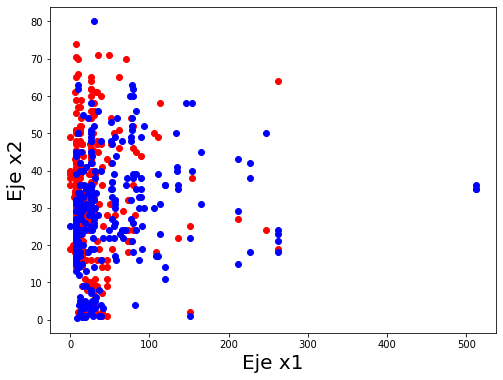

In [54]:
fig = plt.figure(figsize=(8, 6))
x1 = np.array(df[df["Survived"]==0]["Fare"])
y1 = np.array(df[df["Survived"]==0]["Age"])


x2=np.array(df[df["Survived"]==1]["Fare"])
y2=np.array(np.array(df[df["Survived"]==1]["Age"]))
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")
plt.xlabel("Eje x1", fontsize=20)
plt.ylabel("Eje x2", fontsize=20)
plt.show()

In [44]:
df3[df3["Survived"]==0].shape

(549, 3)

In [45]:
df3[df3["Survived"]==1].shape

(342, 3)

In [60]:
X=np.array(df[["Age","Fare"]])
y=np.array(df["Survived"])
#Entrenamiento de la neurona 
errores=[]
for i in range(100):
    error=0
    for xi, target in zip(X, y):
        yhat = Escalon(Neurona(xi,W,b))
        inc_w = eta*(target-yhat)*xi
        W += inc_w
        b += eta*(target-yhat)
        error += abs(eta*(target-yhat))
    errores.append(error)

In [61]:
# Prueba de la neurona
for xi in X:
    print(Escalon(Neurona(xi,W,b)))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


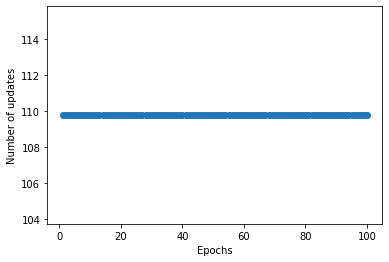

In [62]:
plt.plot(range(1, len(errores) + 1), errores, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

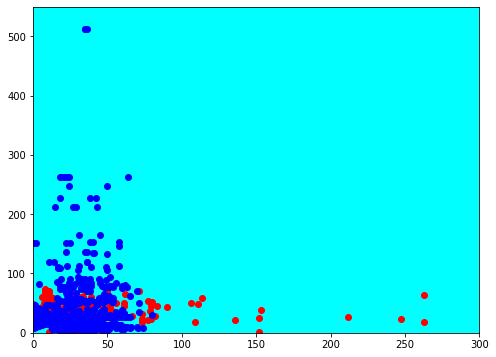

In [66]:
x_min = 0
x_max = 300
y_min = 0
y_max = 550

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
ZZ = np.zeros([200,200])
for i in range(200):
    for j in range(200):
        Z=np.array([XX[i,j],YY[i,j]])
        yhat=Escalon(sum(Z*W)+b)
        ZZ[i,j]=yhat


plt.figure(figsize=(8, 6))
plt.pcolormesh(XX, YY, ZZ > 0, cmap="cool", shading='auto')

x2=np.array(df["Age"])
y2=np.array(df["Fare"])
plt.scatter(x1, y1, color="red")
plt.scatter(x2, y2, color="blue")

plt.show()

In [ ]:
# No funciona el perceptron porque las clases estan mezcladas y solo funciona con puntos bien definidos
# Para categoricas dummies tampoco funciona bien

In [67]:
import math

def sigmoid(x):
      return 1 / (1 + math.exp(-x))

In [71]:
sigmoid(1.66)

0.8402380030563309